# TP4 GaboG

Para las imágenes suministradas:

1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imagen 
3. Comparar los histogramas


In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def convert_gray(img_in):
    return cv.cvtColor(img_in, cv.COLOR_BGR2GRAY)

In [3]:
def lbp(gray_img):

    #Init lbp matrix with zeros and shape rows x columns
    lbp = np.zeros((gray_img.shape[0], gray_img.shape[1]))

    # anti-clockwise neighbours 
    h_idx = np.array([-1, -1,  0,  1,  1,  1,  0, -1])
    v_idx = np.array([ 0, -1, -1, -1,  0,  1,  1,  1])
    
    # Implement LBP Algorithm
    for x in range(1, gray_img.shape[1] - 1):
        for y in range(1, gray_img.shape[0] - 1):
            center = gray_img[y, x]
            nbh = gray_img[v_idx + y, h_idx + x]
            lbp[y, x] = np.sum(np.multiply([2**i for i in range(0,8)], (nbh >= center)))

    #Crop the borders
    lbp = lbp[1:-1, 1:-1]

    return lbp

In [5]:
# Creamos una lista con todas las imágenes

images = []
images.append(cv.imread('images/Imagen1.png'))
images.append(cv.imread('images/Imagen2.png'))
images.append(cv.imread('images/Imagen3.png'))
images.append(cv.imread('images/Imagen4.png'))
images.append(cv.imread('images/Imagen5.png'))

# Pasamos las imágenes a escala de grises
images_gray = [convert_gray(img) for img in images]

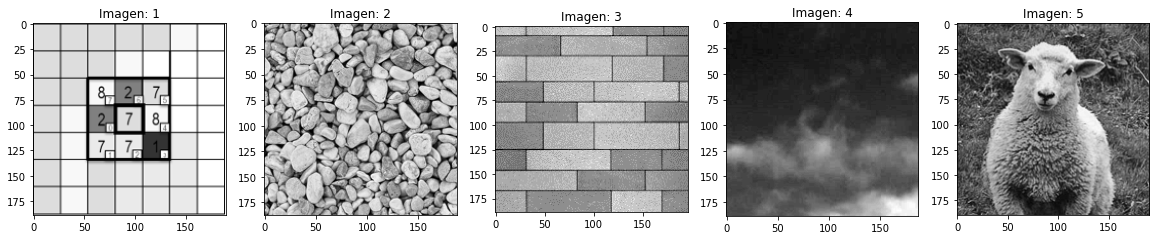

In [9]:
fig = plt.figure(figsize=(20,10))
c=1 
for i in images_gray:
    plt.subplot(1, 5, c)
    plt.title(f'Imagen: {c}')
    ax = plt.imshow(i, cmap='gray')
    c += 1


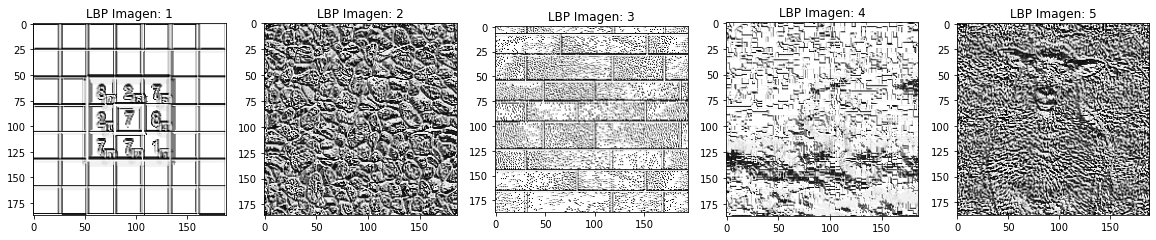

In [10]:
# Perform lbp calculation and getting lbp images

images_lbp = [lbp(img) for img in images_gray]

fig = plt.figure(figsize=(20,5))
c=1 
for i in images_lbp:
    plt.subplot(1, 5, c)
    plt.title(f'LBP Imagen: {c}')
    ax = plt.imshow(i, cmap='gray')
    c += 1

2.

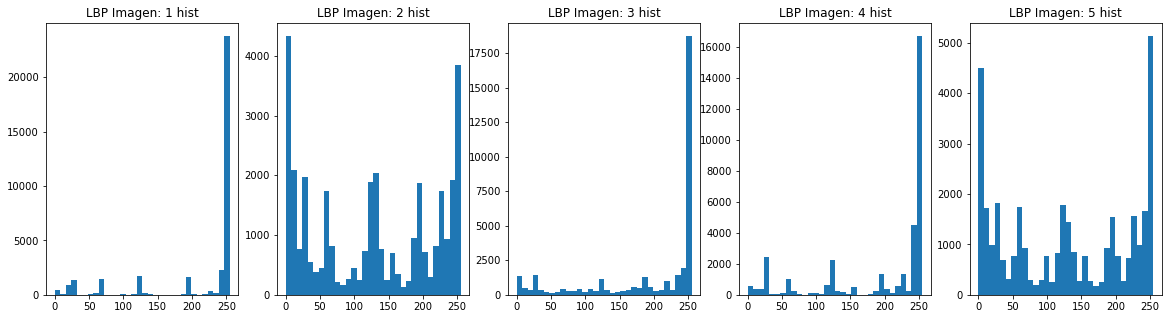

In [11]:
# Histogram plots
fig = plt.figure(figsize=(20,5))
c=1 
for i in range(len(images_lbp)):
    plt.subplot(1, 5, c)
    plt.title(f'LBP Imagen: {c} hist')
    plt.hist(images_lbp[i].ravel(), bins = 32)
    c += 1

3.

In [12]:
# Comparing histograms using correlation index between them

# Create a list with the hist values per image
hist_list = []

np.float32
for i in range(len(images_lbp)):
    hist_list.append(np.float32(np.histogram(images_lbp[i], density=True, bins=256)[0]))

# Calculate correlation index
data = []
for i in range(len(images_lbp)):
    for j in range(len(images_lbp)):
        data.append(cv.compareHist(np.float32(hist_list[i]), np.float32(hist_list[j]), cv.HISTCMP_CORREL))

# Reshaping array to 5x5 Matrix
lbp_matrix_corr = np.array(data).reshape(5,5)

Text(0.5, 1.0, ' LBP Images correlation heatmap')

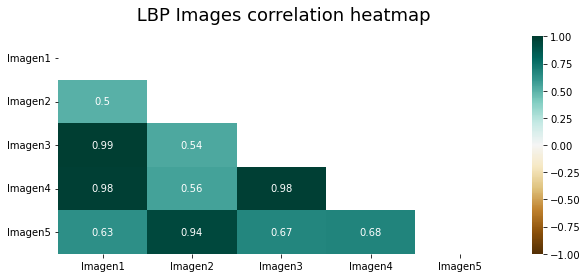

In [13]:
# Plotting correlation heatmap
labels = ['Imagen1','Imagen2','Imagen3','Imagen4','Imagen5']
plt.figure(figsize=(10, 4))
mask = np.triu(np.ones_like(lbp_matrix_corr))
heatmap = sns.heatmap(lbp_matrix_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', xticklabels=labels, yticklabels=labels)
heatmap.set_title(f' LBP Images correlation heatmap', fontdict={'fontsize':18}, pad=16)

From this, We can see that the most correlated images according to their textures are image3(bricks) and image1(numbers). And the less correlated are the image2(stones) with the image1(numbers).